<a href="https://colab.research.google.com/github/pal2004/pal2004/blob/main/weblog_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [105]:
df=pd.read_csv('/content/weblog.csv')

In [106]:
df.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [107]:
df.isnull().sum()

IP       0
Time     0
URL      0
Staus    0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16007 entries, 0 to 16006
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      16007 non-null  object
 1   Time    16007 non-null  object
 2   URL     16007 non-null  object
 3   Staus   16007 non-null  object
dtypes: object(4)
memory usage: 500.3+ KB


In [109]:
df['IP'].value_counts()

IP
10.128.2.1    4257
10.131.0.1    4198
10.130.2.1    4056
10.129.2.1    1652
10.131.2.1    1626
chmod:          95
rm:             72
[Tue            17
sh:              7
[Thu             6
timeout:         5
[Wed             5
[Mon             5
a.out:           4
[Fri             1
[Sat             1
Name: count, dtype: int64

In [110]:
df['Staus'].unique()

array(['200', '302', '304', '206', '404', 'No', 'dumped', 'Segmentation',
       'Assertion', 'Aborted', '2017]', 'found', '2018]'], dtype=object)

Accepted-->202



In [112]:
df['Staus'].value_counts()

Staus
200             11330
302              3498
304               658
404               251
No                167
206                52
2018]              28
2017]               7
dumped              5
Assertion           4
Aborted             4
found               2
Segmentation        1
Name: count, dtype: int64

In [113]:
df['Staus'].unique()

array(['200', '302', '304', '206', '404', 'No', 'dumped', 'Segmentation',
       'Assertion', 'Aborted', '2017]', 'found', '2018]'], dtype=object)

In [114]:
list1=[]
for i in df['Staus'].unique():
  if i.isdigit():
    list1.append(i)

In [115]:
list1

['200', '302', '304', '206', '404']

In [116]:
condition=df['Staus'].isin(list1)

In [117]:
filtered_df=df[condition]

In [118]:
filtered_df

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200
...,...,...,...,...
16002,10.130.2.1,[02/Mar/2018:15:47:12,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16003,10.130.2.1,[02/Mar/2018:15:47:23,GET /allsubmission.php HTTP/1.1,200
16004,10.130.2.1,[02/Mar/2018:15:47:32,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200
16005,10.130.2.1,[02/Mar/2018:15:47:35,GET /allsubmission.php HTTP/1.1,200


In [119]:
filtered_df.shape

(15789, 4)

In [120]:
filtered_df['Staus'].unique()

array(['200', '302', '304', '206', '404'], dtype=object)

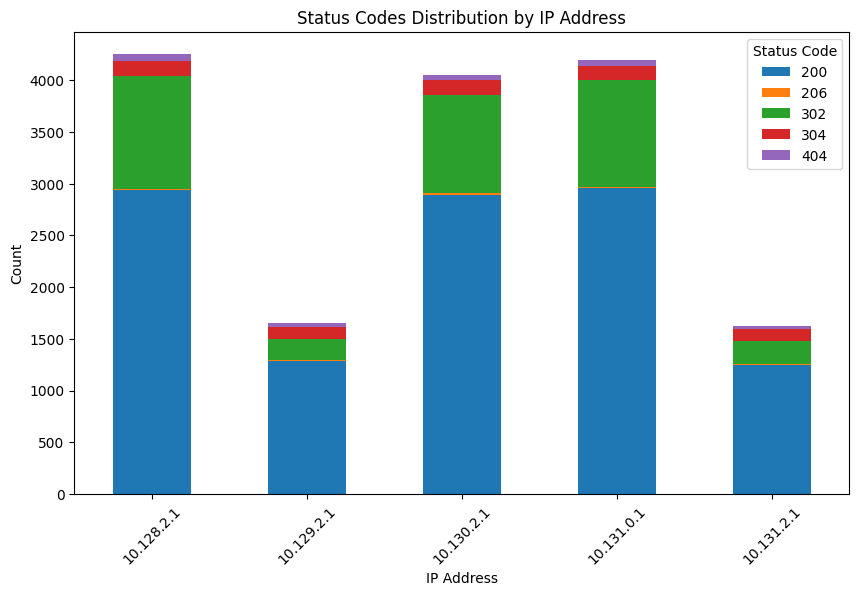

In [121]:

status_counts = filtered_df.groupby(['IP', 'Staus']).size().unstack(fill_value=0)
status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Status Codes Distribution by IP Address')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status Code')
plt.show()


In [127]:
filtered_df[filtered_df['Staus']=='404']

,IP,Time,URL,Staus
546,10.131.0.1,[29/Nov/2017:19:22:12,GET /robots.txt HTTP/1.1,404
645,10.130.2.1,[30/Nov/2017:07:24:34,GET /robots.txt HTTP/1.1,404
650,10.131.0.1,[30/Nov/2017:07:26:06,GET /robots.txt HTTP/1.1,404
665,10.130.2.1,[30/Nov/2017:08:08:51,GET /robots.txt HTTP/1.1,404
672,10.128.2.1,[30/Nov/2017:08:47:05,GET /favicon.ico HTTP/1.1,404
...,...,...,...,...
15803,10.130.2.1,[28/Feb/2018:20:47:33,GET /favicon.ico HTTP/1.1,404
15820,10.128.2.1,[01/Mar/2018:00:37:58,GET /robots.txt HTTP/1.1,404
15833,10.130.2.1,[01/Mar/2018:11:08:35,GET /robots.txt HTTP/1.1,404
15965,10.128.2.1,[02/Mar/2018:06:55:37,GET /robots.txt HTTP/1.1,404


In [128]:
ip_counts = filtered_df['IP'].value_counts()
most_common_ip = ip_counts.idxmax()
print("IP address with the most occurrences of status code 404:", most_common_ip)

IP address with the most occurrences of status code 404: 10.128.2.1
